<a href="https://colab.research.google.com/github/Donyicoder2006/Project_works/blob/main/Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN5**

In [ ]:
!pip install keras-tuner
!pip install tensorflow
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 12.0 MB/s eta 0:00:00


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Nadam, Adadelta, Adamax
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data2 = pd.read_excel(r'/content/Classification_model_dataset.xlsx')

In [3]:
data2.columns

Index(['Resturant_id', 'Resturant_Name', 'Cuisine', 'Location', 'City',
       'Ratings'],
      dtype='object')

In [4]:
import numpy as np

conditions_data2 = [
    (data2['Ratings'] >= 2.4) & (data2['Ratings'] < 3.5),
    (data2['Ratings'] >= 3.5) & (data2['Ratings'] < 4.5),
    (data2['Ratings'] >= 4.5) & (data2['Ratings'] <= 4.9)
]

choices_data2 = ['poor feedback', 'median feedback', 'excellent feedback']

data2['Feedback'] = np.select(conditions_data2, choices_data2, default='Other')
data2 = data2.drop('Ratings', axis=1)

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [6]:
encode = OrdinalEncoder()

In [7]:
data2.columns

Index(['Resturant_id', 'Resturant_Name', 'Cuisine', 'Location', 'City',
       'Feedback'],
      dtype='object')

In [8]:
x = data2.drop(['Feedback','Resturant_id'], axis=1)
y = data2['Feedback']

In [9]:
x_encoded = encode.fit_transform(x)
y_encoded = encode.fit_transform(y.values.reshape(-1, 1))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded.ravel(), test_size=0.2, random_state=42)

In [11]:
!pip install keras_tuner

In [12]:
import keras_tuner as kt

In [13]:
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
      if counter == 0:
        model.add(Dense
         (units=hp.Int('units' + str(i), min_value=5, max_value=150, step=5),
         activation=hp.Choice('activation' + str(i), ['relu', 'tanh', 'sigmoid','selu','linear','softmax','softplus','silu','mish']),
         input_dim=x_train.shape[1]
          )
         )
        model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9])))
        model.add(BatchNormalization())
      else:
        model.add(Dense
         (units=hp.Int('units' + str(i), min_value=8, max_value=150, step=8),
         activation=hp.Choice('activation' + str(i), ['relu', 'tanh', 'sigmoid','selu','linear','softmax','softplus','silu','mish']))
          )
        model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9])))
        model.add(BatchNormalization())
        counter += 1
    model.add(Dense(3, activation='softmax'))

    learning_rate = hp.Float('learning_rate', min_value=0.000000001, max_value=0.0001)
    optimizer_choice = hp.Choice('optimizer',values = ['RMSprop','Adam','SGD','Nadam','Adadelta','Adamax'])

    if optimizer_choice == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_choice == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_choice == 'Nadam':
        optimizer = Nadam(learning_rate=learning_rate)
    elif optimizer_choice == 'Adadelta':
        optimizer = Adadelta(learning_rate=learning_rate)
    elif optimizer_choice == 'Adamax':
        optimizer = Adamax(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [14]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 6,
                        directory = 'dir1',
                        project_name = 'project1')

Reloading Tuner from dir1/project1/tuner0.json


In [15]:
tuner.search(x_train, y_train, epochs=10, validation_data = (x_test,y_test))

In [16]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'units0': 140,
 'activation0': 'relu',
 'dropout0': 0.3,
 'learning_rate': 3.8875467970531016e-05,
 'optimizer': 'Adam',
 'units1': 105,
 'activation1': 'softplus',
 'dropout1': 0.4,
 'units2': 75,
 'activation2': 'silu',
 'dropout2': 0.4,
 'units3': 70,
 'activation3': 'linear',
 'dropout3': 0.1,
 'units4': 65,
 'activation4': 'softplus',
 'dropout4': 0.1,
 'units5': 35,
 'activation5': 'softmax',
 'dropout5': 0.9,
 'units6': 50,
 'activation6': 'sigmoid',
 'dropout6': 0.4,
 'units7': 90,
 'activation7': 'softmax',
 'dropout7': 0.6,
 'units8': 35,
 'activation8': 'softmax',
 'dropout8': 0.7,
 'units9': 70,
 'activation9': 'mish',
 'dropout9': 0.4}

In [17]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=15,
                           restore_best_weights=True,
                           verbose = 1,
                           min_delta = 0.0000000000000000000000000000001,
                           mode = 'auto'
                           )

In [18]:
successful_trials = list(tuner.oracle.trials.values())
all_hyperparameters = []

for trial in successful_trials:
    all_hyperparameters.append(trial.hyperparameters.values)

print("Number of successful trials found:", len(all_hyperparameters))
print("Hyperparameters of the first successful trial:", all_hyperparameters[0])

Number of successful trials found: 6
Hyperparameters of the first successful trial: {'num_layers': 6, 'units0': 140, 'activation0': 'relu', 'dropout0': 0.3, 'learning_rate': 3.8875467970531016e-05, 'optimizer': 'Adam', 'units1': 105, 'activation1': 'softplus', 'dropout1': 0.4, 'units2': 75, 'activation2': 'silu', 'dropout2': 0.4, 'units3': 70, 'activation3': 'linear', 'dropout3': 0.1, 'units4': 65, 'activation4': 'softplus', 'dropout4': 0.1, 'units5': 35, 'activation5': 'softmax', 'dropout5': 0.9, 'units6': 50, 'activation6': 'sigmoid', 'dropout6': 0.4, 'units7': 90, 'activation7': 'softmax', 'dropout7': 0.6, 'units8': 35, 'activation8': 'softmax', 'dropout8': 0.7, 'units9': 70, 'activation9': 'mish', 'dropout9': 0.4}


In [19]:
trained_histories = {}

for i, trial in enumerate(successful_trials):
    hp = trial.hyperparameters
    optimizer_name = hp.get('optimizer')
    trial_key = f"{optimizer_name}_trial_{i+1}"

    print(f"{optimizer_name}")
    model = build_model(hp)

    history = model.fit(x_train, y_train, epochs=30, batch_size=10, validation_data=(x_test, y_test))
    trained_histories[trial_key] = history


Adam


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3297 - loss: 1.3063 - val_accuracy: 0.5826 - val_loss: 1.0268
Epoch 2/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4091 - loss: 1.1804 - val_accuracy: 0.5837 - val_loss: 0.9501
Epoch 3/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4404 - loss: 1.1158 - val_accuracy: 0.5830 - val_loss: 0.9303
Epoch 4/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4728 - loss: 1.0552 - val_accuracy: 0.5834 - val_loss: 0.8987
Epoch 5/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4901 - loss: 1.0207 - val_accuracy: 0.5830 - val_loss: 0.8824
Epoch 6/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5125 - loss: 0.9889 - val_accuracy: 0.5849 - val_loss: 0.8647
Epoch 7/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5207 - loss: 0.9564 - val_accuracy: 0.5845 - val_loss: 0.8559
Epoch 8/30
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5201 - loss: 0.9527 -

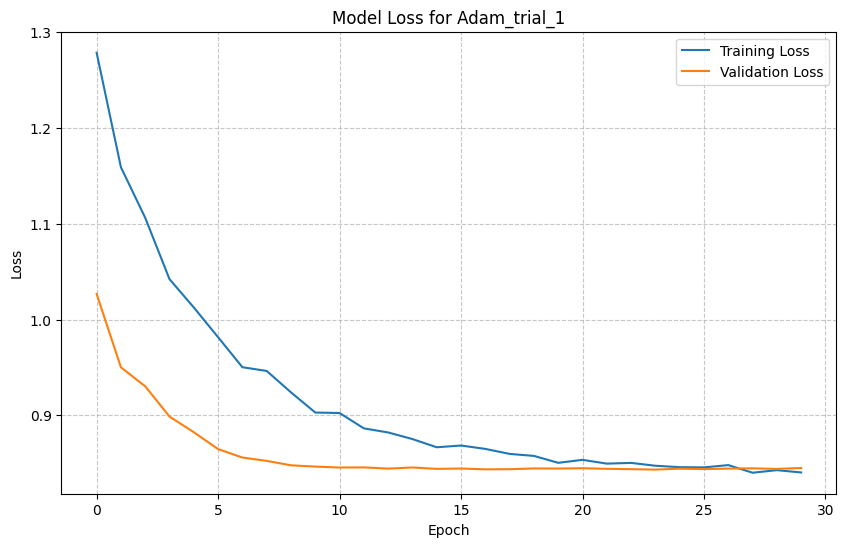

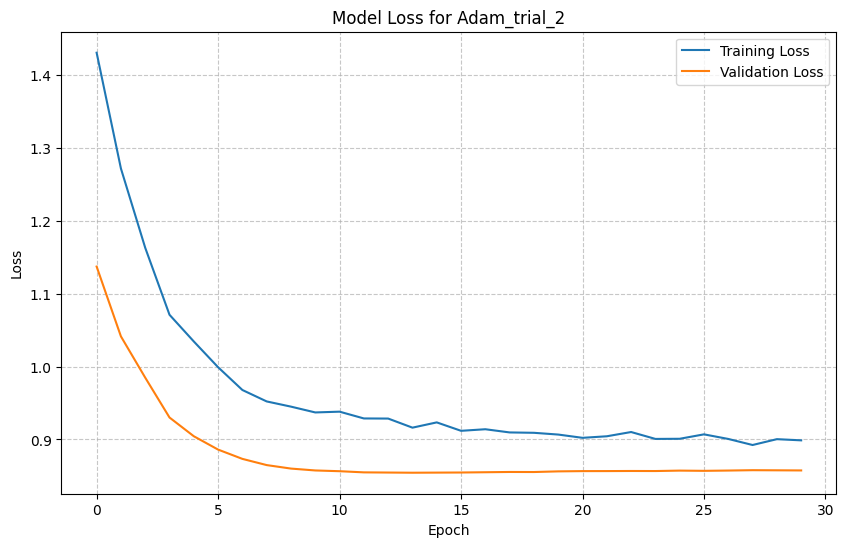

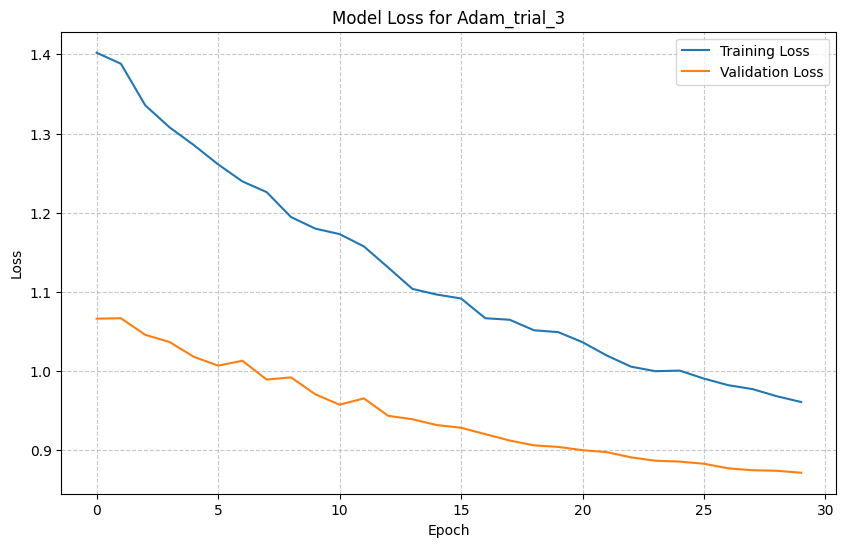

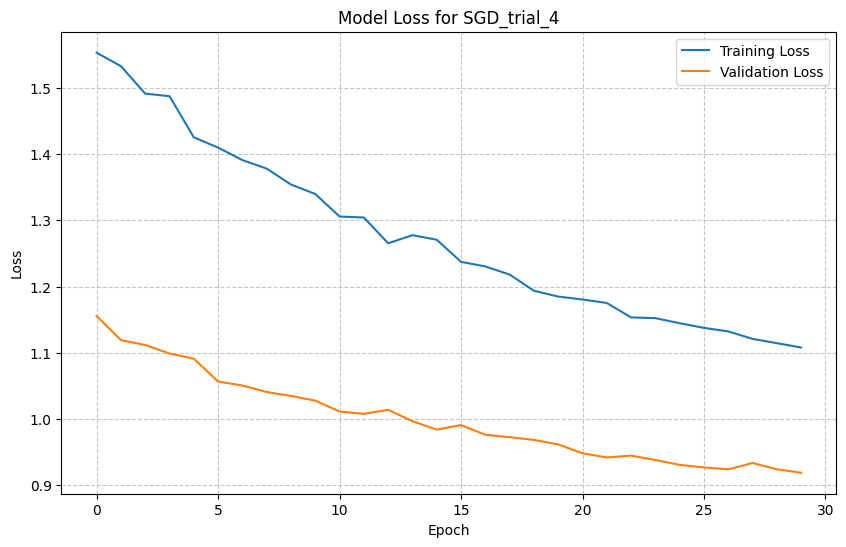

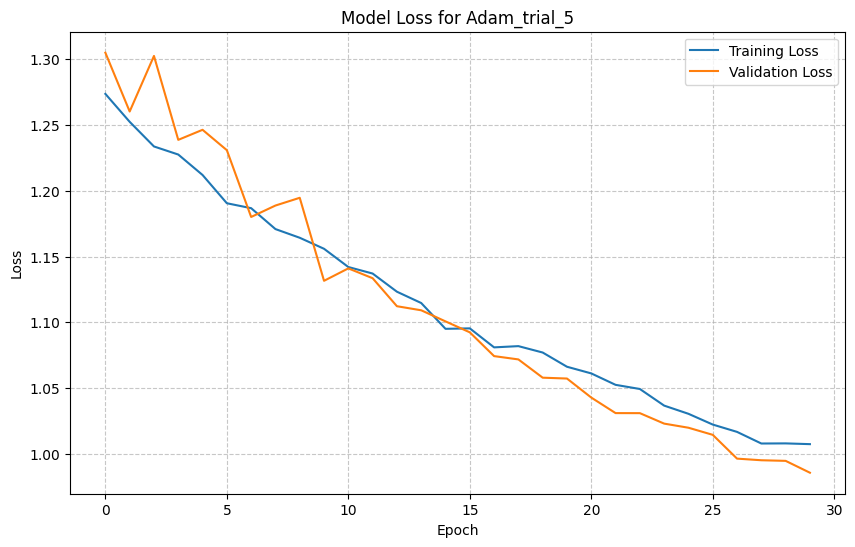

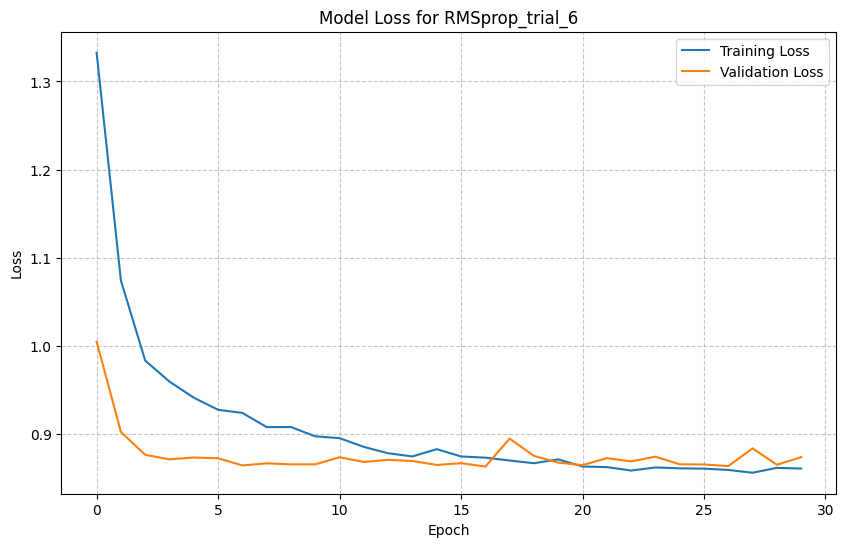

Loss plots generated for all trained models.


In [20]:
import matplotlib.pyplot as plt

for trial_key, history in trained_histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for {trial_key}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

print("Loss plots generated for all trained models.")


Model Structure for Adam_trial_1:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_98 (Dense)                │ (None, 140)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_86          │ (None, 140)            │           560 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 105)            │        14,805 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 105)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_87          │ (None, 105)            │           420 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 75)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_88          │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 70)             │         5,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_89          │ (None, 70)             │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 65)             │         4,615 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_90          │ (None, 65)             │           260 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 35)             │         2,310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_91          │ (None, 35)             │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 3)              │           108 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,768 (147.53 KB)

 Trainable params: 36,788 (143.70 KB)

 Non-trainable params: 980 (3.83 KB)

Model structure saved to model_structure_Adam_trial_1.png


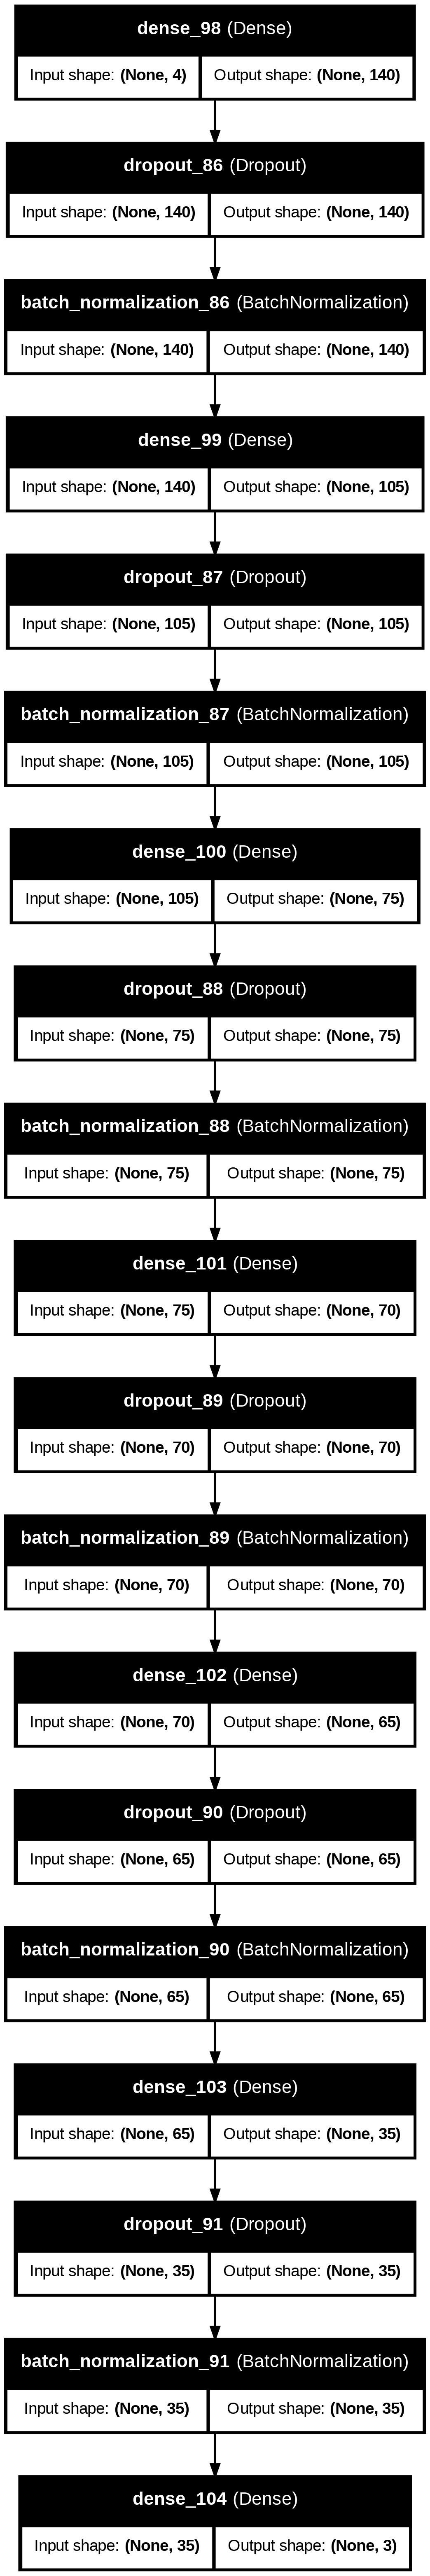


Model Structure for Adam_trial_2:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)               │ (None, 35)             │           175 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_92          │ (None, 35)             │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 35)             │         1,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_93          │ (None, 35)             │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 5)              │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 105)            │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 105)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 105)            │           420 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 25)             │         2,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 105)            │         2,730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 105)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 105)            │           420 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 3)              │           318 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,183 (35.87 KB)

 Trainable params: 8,563 (33.45 KB)

 Non-trainable params: 620 (2.42 KB)

Model structure saved to model_structure_Adam_trial_2.png


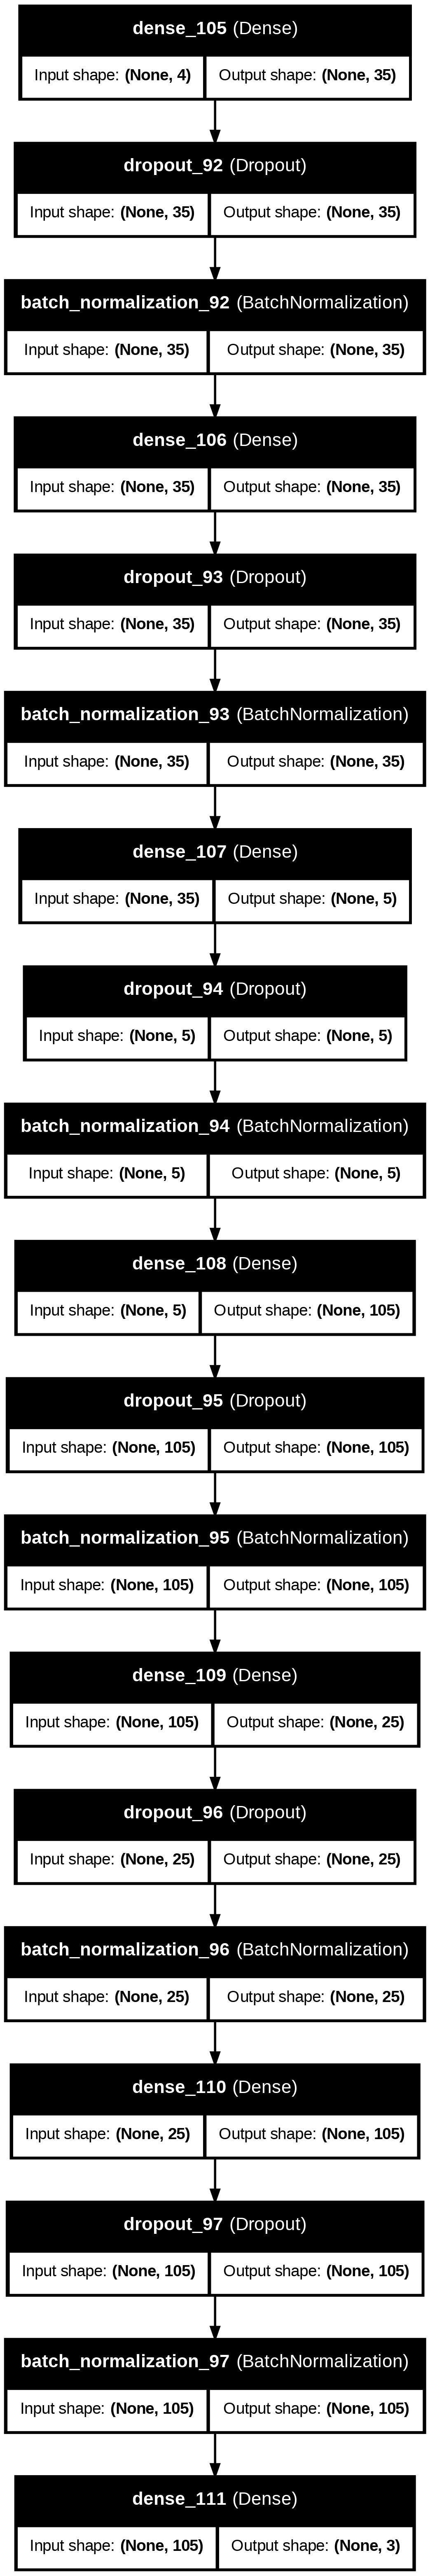


Model Structure for Adam_trial_3:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)               │ (None, 70)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 70)             │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 10)             │           710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 140)            │         1,540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 140)            │           560 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 75)             │        10,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_101 (Dropout)           │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_101         │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 20)             │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,018 (62.57 KB)

 Trainable params: 15,388 (60.11 KB)

 Non-trainable params: 630 (2.46 KB)

Model structure saved to model_structure_Adam_trial_3.png


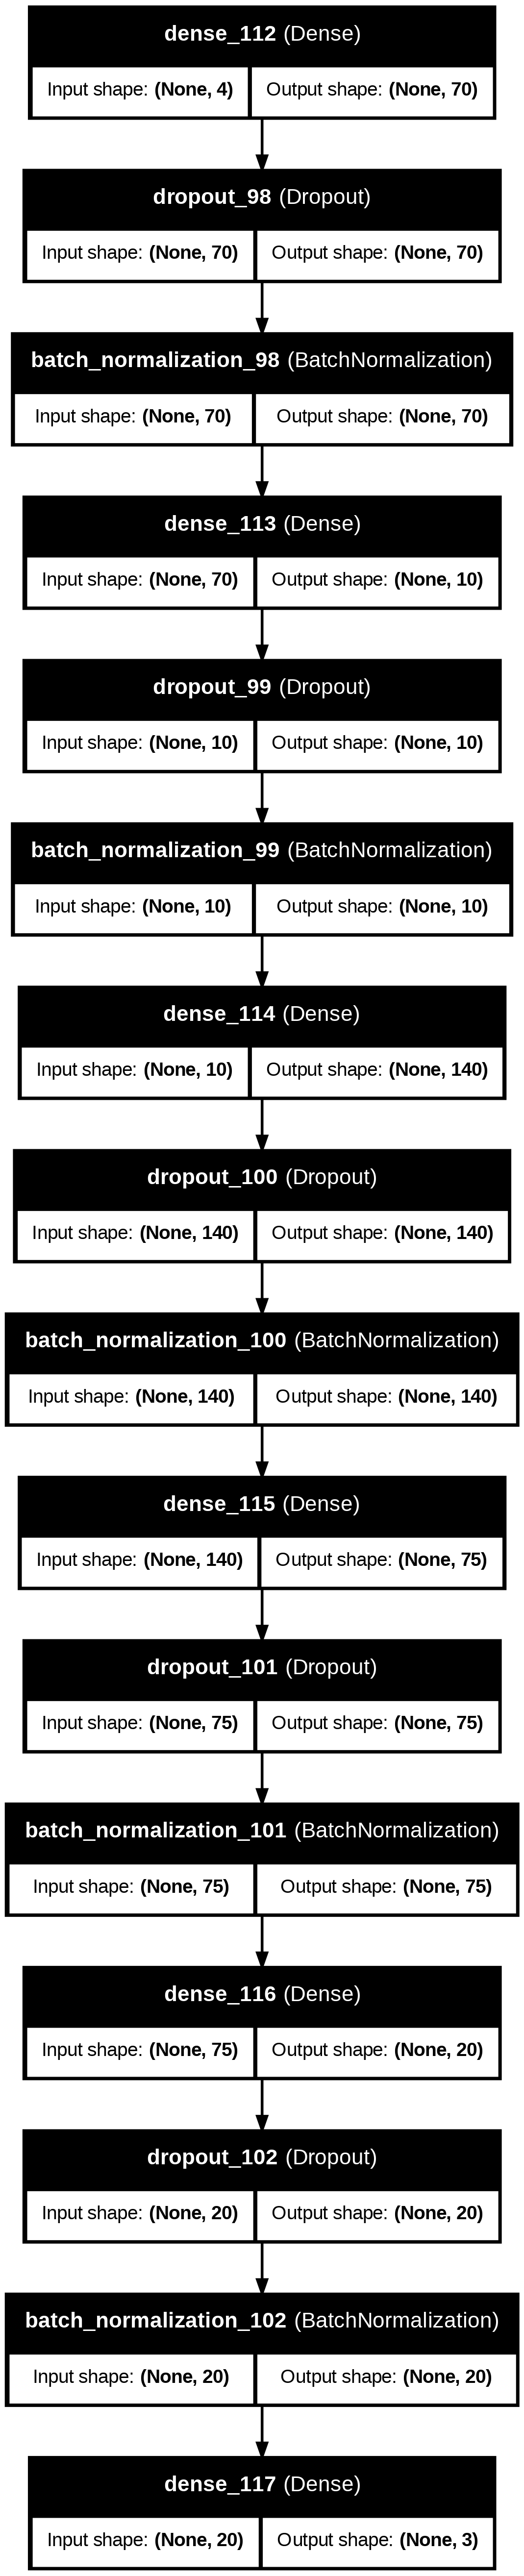


Model Structure for SGD_trial_4:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)               │ (None, 45)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_103 (Dropout)           │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 45)             │           180 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 130)            │         5,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_104 (Dropout)           │ (None, 130)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_104         │ (None, 130)            │           520 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 150)            │        19,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_105 (Dropout)           │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 150)            │           600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_106 (Dropout)           │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_106         │ (None, 150)            │           600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 115)            │        17,365 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 115)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_107         │ (None, 115)            │           460 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 35)             │         4,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_108         │ (None, 35)             │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 45)             │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_109         │ (None, 45)             │           180 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 78,738 (307.57 KB)

 Trainable params: 77,228 (301.67 KB)

 Non-trainable params: 1,510 (5.90 KB)

Model structure saved to model_structure_SGD_trial_4.png


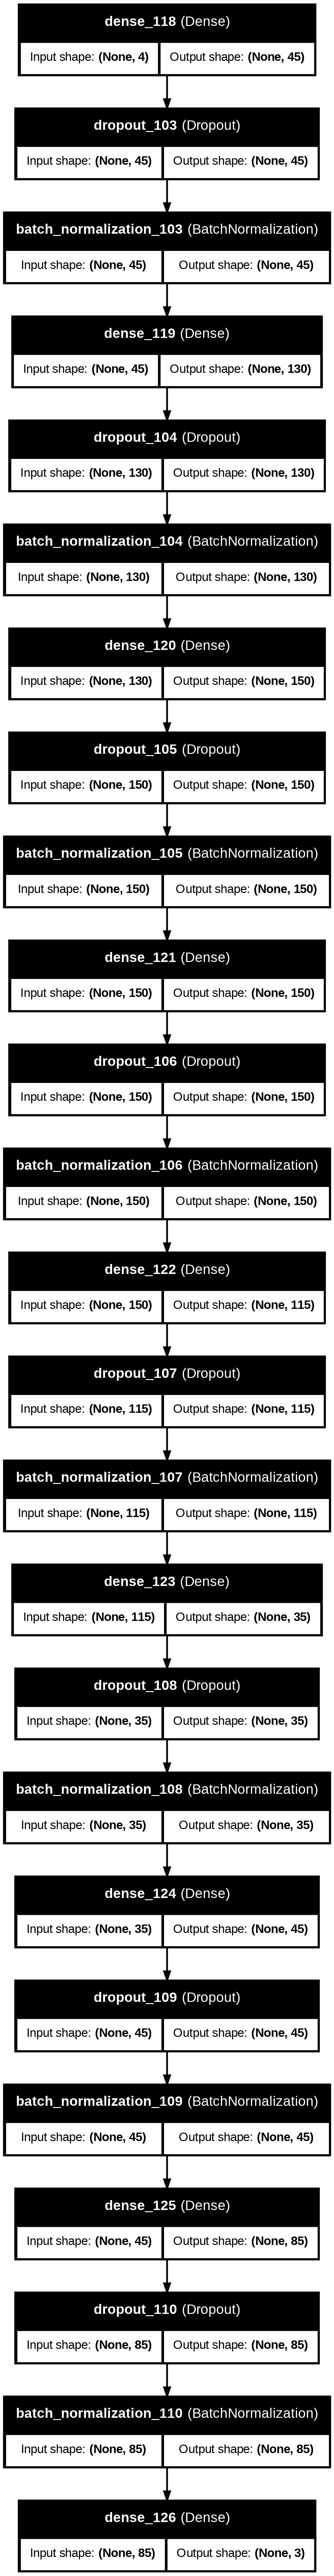


Model Structure for Adam_trial_5:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_127 (Dense)               │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_112         │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_114 (Dropout)           │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_114         │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_115 (Dropout)           │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_116 (Dropout)           │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_117 (Dropout)           │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 583 (2.28 KB)

 Trainable params: 473 (1.85 KB)

 Non-trainable params: 110 (440.00 B)

Model structure saved to model_structure_Adam_trial_5.png


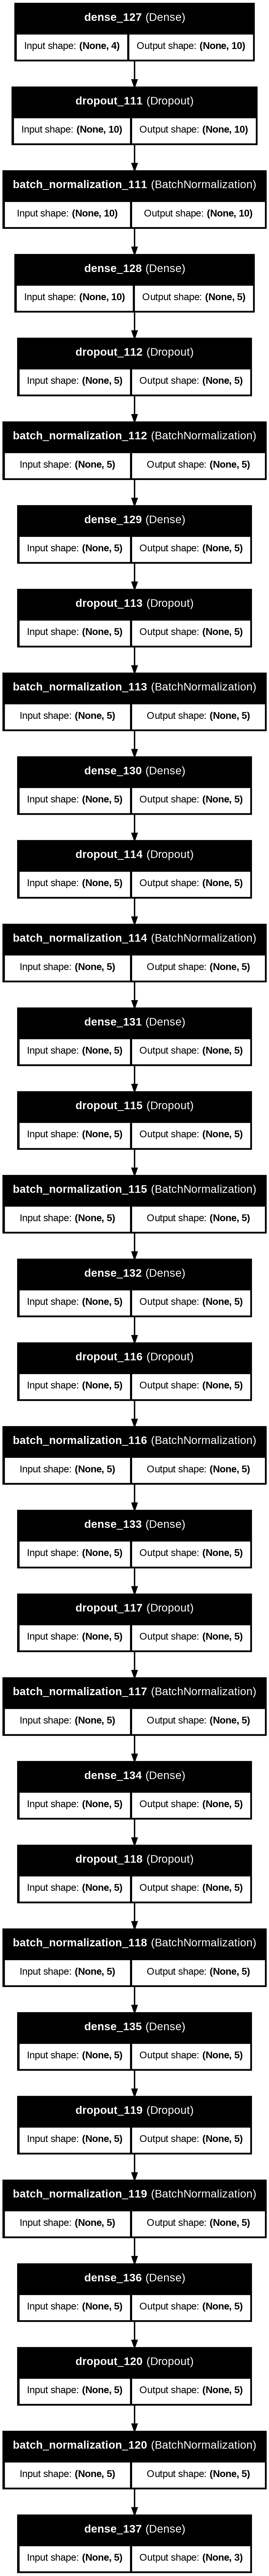


Model Structure for RMSprop_trial_6:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_138 (Dense)               │ (None, 95)             │           475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_121 (Dropout)           │ (None, 95)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_121         │ (None, 95)             │           380 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 25)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_122 (Dropout)           │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_122         │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 120)            │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_123 (Dropout)           │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_123         │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 15)             │         1,815 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_124 (Dropout)           │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_124         │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 145)            │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_125 (Dropout)           │ (None, 145)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_125         │ (None, 145)            │           580 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 115)            │        16,790 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_126 (Dropout)           │ (None, 115)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_126         │ (None, 115)            │           460 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 55)             │         6,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_127 (Dropout)           │ (None, 55)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_127         │ (None, 55)             │           220 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 42,513 (166.07 KB)

 Trainable params: 41,153 (160.75 KB)

 Non-trainable params: 1,360 (5.31 KB)

Model structure saved to model_structure_RMSprop_trial_6.png


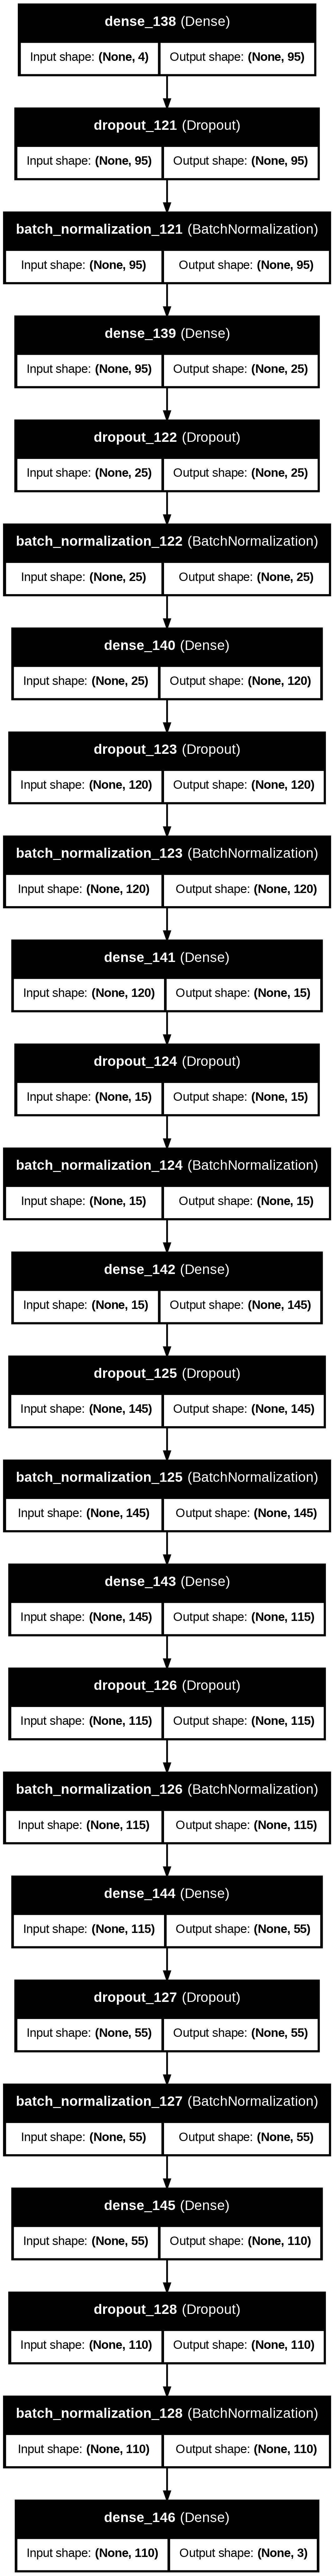

In [22]:
!pip install graphviz
import graphviz
from tensorflow.keras.utils import plot_model
from IPython.display import Image

for i, trial in enumerate(successful_trials):
    hp = trial.hyperparameters
    optimizer_name = hp.get('optimizer')
    trial_key = f"{optimizer_name}_trial_{i+1}"

    print(f"\nModel Structure for {trial_key}:")
    model = build_model(hp)
    model.summary()
    file_path = f'model_structure_{trial_key}.png'
    plot_model(model, to_file=file_path, show_shapes=True, show_layer_names=True)
    print(f"Model structure saved to {file_path}")
    display(Image(filename=file_path))